In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
np.random.seed(42)

In [16]:
data = load_iris()
X, Y = data.data, data.target
X = X.reshape(X.shape[1], X.shape[0])
Y = Y.reshape(1, Y.shape[0])

print(X.shape, Y.shape)

(4, 150) (1, 150)


In [17]:
def get_dims(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]

    return (n_x, n_h, n_y)

In [18]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.rand(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    return {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

In [19]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [20]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {
        'Z1': Z1,
        'A1': A1,
        'Z2': Z2,
        'A2': A2
    }

    return A2, cache

In [21]:
def compute_cost(Y, Yhat):
    m = Y.shape[1]

    logprobs = np.multiply(Y, np.log(Yhat)) + np.multiply((1 - Y), np.log(1 - Yhat))

    cost = -1/m * np.sum(logprobs)

    return cost

In [22]:
def backward_propagation(X, Y, parameters, cache):

    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']


    Z1 = cache['Z1']
    A1 = cache['A1']
    Z2 = cache['Z2']
    A2 = cache['A2']

    m = Y.shape[1]

    dZ2 = (A2 - Y)
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * (1 - np.tanh(Z1) ** 2)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    grads = {
        'dW1': dW1,
        'db1': db1,
        'dW2': dW2,
        'db2': db2
    }

    return grads


In [23]:
def update_parameters(grads, parameters, learning_rate=0.01):

    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    updated_parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return updated_parameters


In [32]:
def nn_model(X, Y, learning_rate=0.01, num_iterations=100, print_cost=False):

    n_x, n_h, n_y = get_dims(X, Y)
    params = initialize_parameters(n_x, n_h, n_y)
    costs = []

    for i in range(num_iterations):
        Yhat, cache = forward_propagation(X, params)
        cost = compute_cost(Y, Yhat)
        costs.append(cost)
        grads = backward_propagation(X, Y, params, cache)
        params = update_parameters(grads, params)


        if print_cost and i % 10 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))


    return params, costs

In [33]:
def predict(X, parameters):

    A2, cache = forward_propagation(X, parameters)
    A2[A2 > 0.5] = 1
    A2[A2 <= 0.5] = 0

    return A2

In [34]:
params, costs = nn_model(X, Y, num_iterations=100, print_cost=True)

Cost after iteration 0: 0.692989
Cost after iteration 10: 0.667965
Cost after iteration 20: 0.643792
Cost after iteration 30: 0.620014
Cost after iteration 40: 0.596017
Cost after iteration 50: 0.571055
Cost after iteration 60: 0.544414
Cost after iteration 70: 0.515648
Cost after iteration 80: 0.484727
Cost after iteration 90: 0.452058


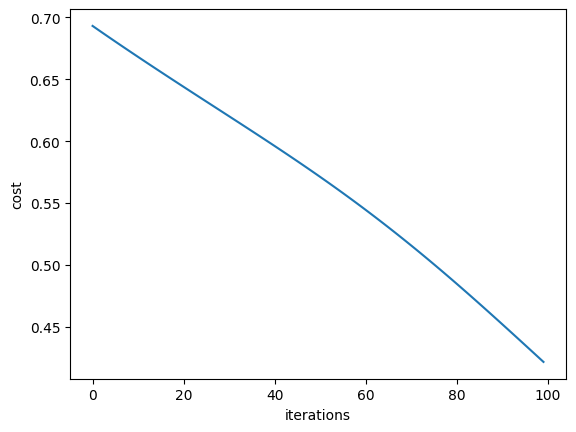

In [35]:
plt.plot(range(100), costs)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()